In [2]:
import os
import sys
from gurobipy import *
import pandas as pd
import numpy as np
import itertools
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

module_path = os.path.abspath("..")
sys.path.append(module_path)
from module.modele2 import init_model,Taches
from module.utils2 import (
    read_sillon,
    init_t_a,
    init_t_d,
    init_dict_correspondance,
    base_time,
    init_limites_voies,
    dernier_depart,
    ecriture_donnees_sortie
)
from module.visualisation2 import (
    visualisation_gantt,
    visualisation_occupation
)

In [3]:
# Charger le fichier Excel

id_file = 2

if id_file == 0:
    file = "mini_instance.xlsx"
elif id_file == 1:    
    file = "instance_WPY_realiste_jalon1.xlsx"
elif id_file == 2:
    file = "instance_WPY_realiste_jalon2.xlsx"
elif id_file == 3:
    file = "instance_WPY_simple.xlsx"
else:
    raise ValueError(f"Erreur : '{id_file}' n'est pas une valeur acceptable. Choisissez parmi 0, 1, 2 et 3.")

# Lire les feuilles "Sillons arrivée" et "Sillons départ"
df_sillons_arr, df_sillons_dep = read_sillon(file)

# Dictionnaires pour stocker les temps d'arrivée et de départ en minutes :
# Traitement des arrivées
t_a = init_t_a(df_sillons_arr, id_file)

t_d = init_t_d(df_sillons_dep, id_file)

#Initialisation de l'intervalle de temps étudié
t_min=0
t_max=int(dernier_depart(df_sillons_dep,base_time(id_file))) #en quinzaine de minutes
#print(t_max//15+1)

# Vérification finale
#print("Vérification du contenu final de t_a :")
#for key, value in t_a.items():
#    print(f"Le train {key} arrive en gare de Woippy au bout de {value} minutes")

#print("Vérification du contenu final de t_d :")
#for key, value in t_d.items():
#    print(f"Le train {key} part de la gare de Woippy au bout de {value} minutes")

df_correspondance = pd.read_excel(file, sheet_name="Correspondances")

D = init_dict_correspondance(df_correspondance, id_file)

#print(D)

In [4]:
model,t_arr,t_dep, is_present = init_model(
    liste_id_train_arrivee = t_a.keys(),
    t_a = t_a,
    liste_id_train_depart = t_d.keys(),
    t_d = t_d,
    dict_correspondances = D,
    file=file,
    id_file = id_file,
    limites_voies=init_limites_voies(file),
    temps_max=int(t_max//15+1),
    temps_min=0
)


Set parameter Username
Set parameter LicenseID to value 2618972
Academic license - for non-commercial use only - expires 2026-02-06


Contrainte assurant la succession des tâches sur les trains d'arrivée: 100%|██████████| 111/111 [00:00<00:00, 6928.61it/s]
Contrainte assurant la succession des tâches sur les trains de départ: 100%|██████████| 106/106 [00:00<00:00, 4667.48it/s]
Contrainte assurant qu'il n'y a qu'un train niveau de la machine DEB: 100%|██████████| 111/111 [00:01<00:00, 68.80it/s]
Contrainte assurant qu'il n'y a qu'un train niveau des machines FOR et DEG: 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]
Contrainte de fermeture du Chantier FOR: 100%|██████████| 106/106 [00:00<00:00, 296.47it/s]
Contrainte assurant la succession des tâches entre les chantiers de REC et FOR: 100%|██████████| 106/106 [00:00<00:00, 7746.66it/s]
Contrainte relative au nombre de voies des chantiers: 100%|██████████| 910/910 [00:00<00:00, 1523.87it/s]
Contrainte définissant le temps de débranchement du premier wagon d'un train de départ: 100%|██████████| 106/106 [00:00<00:00, 12473.94it/s]


In [5]:
model.optimize()

if model.status == GRB.INFEASIBLE:
    print("Le modèle n'a pas de solution")
elif model.status == GRB.UNBOUNDED:
    print("Le modèle est non borné")
else:
    print("Ca marche !")
    for (m, n), var in t_arr.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    for (m, n), var in t_dep.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    print('La valeur objectif est :', model.objVal)

Ca marche !
Tâche 1 - Train 412202_08 : 1260.0
Tâche 1 - Train 431018_08 : 810.0
Tâche 1 - Train 431246_08 : 675.0
Tâche 1 - Train 44951_08 : 1140.0
Tâche 1 - Train 450237_08 : 720.0
Tâche 1 - Train 489016_08 : 1425.0
Tâche 1 - Train 54234_08 : 1335.0
Tâche 1 - Train 55390_08 : 1440.0
Tâche 1 - Train 56135_08 : 1290.0
Tâche 1 - Train 412023_09 : 1575.0
Tâche 1 - Train 41264_09 : 2805.0
Tâche 1 - Train 431802_09 : 1620.0
Tâche 1 - Train 44222_09 : 2535.0
Tâche 1 - Train 44250_09 : 2070.0
Tâche 1 - Train 44865_09 : 2430.0
Tâche 1 - Train 450237_09 : 2160.0
Tâche 1 - Train 471003_09 : 2205.0
Tâche 1 - Train 47262_09 : 1995.0
Tâche 1 - Train 489026_09 : 2025.0
Tâche 1 - Train 54234_09 : 2775.0
Tâche 1 - Train 55390_09 : 2880.0
Tâche 1 - Train 55398_09 : 1680.0
Tâche 1 - Train 56135_09 : 2730.0
Tâche 1 - Train 56730_09 : 1605.0
Tâche 1 - Train 58706_09 : 2715.0
Tâche 1 - Train 412023_10 : 3015.0
Tâche 1 - Train 412202_10 : 4140.0
Tâche 1 - Train 41264_10 : 4245.0
Tâche 1 - Train 431020_10 :

In [6]:
visualisation_gantt(t_arr,t_dep).show()

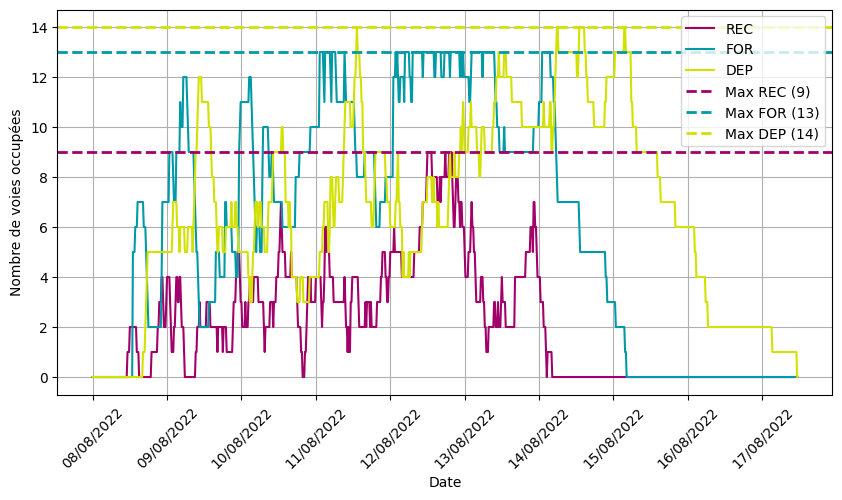

In [7]:
# Correction du format de la date de référence
ref_date = datetime.datetime.strptime("08/08/2022", "%d/%m/%Y")

# Conversion des temps en dates au format "dd/mm/yyyy/HH/MM"
x_date = [ref_date + datetime.timedelta(minutes=15*t) for t in range((t_max-t_min)//15+2)]

# Calcul des voies occupées pour chaque chantier
occupation_REC = np.array([quicksum(is_present['REC'][(id_train, t)].X for id_train in t_a.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_FOR = np.array([quicksum(is_present['FOR'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_DEP = np.array([quicksum(is_present['DEP'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])

if visualisation_occupation(occupation_REC, occupation_FOR, occupation_DEP, x_date):
    plt.show()


In [8]:
ecriture_donnees_sortie(
    t_arr, 
    t_dep, 
    occupation_REC, 
    occupation_FOR, 
    occupation_REC, 
    x_date
)

True